In [67]:
text = ""
with open('surveys.txt') as f:
    for line in f:
        if "username" in line:
            line = line + "||"
        text += line

responses = text.split("||")

usernames = [entry.split(":")[1].strip() for entry in responses if "username" in entry]

table_view = []
labels = []
for entry in responses:
    labels.append(entry.split(":")[0].strip())
    if "username" in entry:
        break
table_view.append(labels)
dict_responses = {label: [] for label in labels}
row = []
for entry in responses:
    key = entry.split(":")[0].strip()
    if key:
        value = "".join(entry.split(":")[1:]).strip()
        dict_responses[key].append(value)
        row.append(value)
        if "username" in entry:
            table_view.append(row)
            row = []

In [68]:
print(labels)

['ui_device', 'ui_easeOfUse', 'ui_schwierigkeiten_frei', 'ui_erwartungen_frei', 'ui_lesbar', 'ui_lesbar_frei', 'ui_design', 'ui_design_frei', 'system_reaktionszeit', 'system_laden', 'system_antwort', 'system_verfuegbar', 'system_bedienbar', 'inhalt_beantwortet', 'inhalt_beantwortet_frei', 'inhalt_anclickbar_hilfreich', 'inhalt_eingaben_erkannt', 'inhalt_eingaben_erkannt_frei', 'inhalt_interaktion', 'inhalt_feedback_positiv_frei', 'inhalt_feedback_negativ_frei', 'inhalt_verstaendlichkeit', 'inhalt_anwort_laenge', 'inhalt_anwort_detail', 'inhalt_antwort_feedback_frei', 'meta_nuetzlich', 'meta_angenehm', 'meta_schlecht', 'meta_hilfreich', 'meta_wirksam', 'meta_irritierend', 'meta_helfend', 'meta_schneller', 'meta_komfortabler', 'meta_informationsgewinnung_frei', 'meta_erwartungen_erfuellt', 'meta_erwartungen_erfuellt_frei', 'meta_use_again', 'meta_situationen_frei', 'meta_methode_interaktion_frei', 'meta_aendern_zum_chatbot_frei', 'meta_andere_szenarien_frei', 'meta_endgeraeten_frei', 'be

In [69]:
question_label_lookup = {
                         "ui_device": "Von welchen Gerät haben Sie die Seite aufgerufen?",
                         "ui_easeOfUse": "Wie leicht ist die Oberfläche zu bedienen?",
                         "ui_schwierigkeiten_frei": "Sind bei der Bedienung des Systems Schwierigkeiten aufgetreten? Falls ja, welche?",
                         "ui_erwartungen_frei": "Befanden sich Elemente nicht wo sie Sie erwarteten? Verhielten sich alle  Elemente wie erwartet? Falls nicht, beschreiben Sie dies bitte kurz.",
                         "ui_lesbar": "Sind alle Elemente der Nutzeroberfläche gut lesbar? Falls nicht, welche?",
                         "ui_lesbar_frei": "Falls Elemente nicht lesbar waren, beschreiben Sie dies bitte kurz.",
                         "ui_design": "Wie gut hat Ihnen das Design gefallen? (Farbschema, Bedienelemente, ...)",
                         "ui_design_frei": "Anmerkungen zum Design: was könnte man besser machen, was hat Ihnen gefallen?",
                         "system_reaktionszeit": "Wie haben Sie Reaktionszeit des Systems empfunden?",
                         "system_laden": "Wie schnell lädt die Website?",
                         "system_antwort": "Ich habe immer eine Antwort vom System bekommen",
                         "system_verfuegbar": "Die Website war mindestens einmal nicht verfügbar",
                         "system_bedienbar": "Ein Bedienelement (Texteingabe, Senden) hat mindestens einmal nicht funktioniert",
                         "inhalt_beantwortet": "Das System konnte meine Fragen beantworten",
                         "inhalt_beantwortet_frei": "Falls Fragen nicht beantwortet wurden, listen Sie hier bitte diejenigen auf, an die Sie sich erinnern.",
                         "inhalt_anclickbar_hilfreich": "Waren die anclickbare Antworten hilfreich?", 
                         "inhalt_eingaben_erkannt": "Wie häufig hat das System ihre Eingaben richtig verstsanden?",
                         "inhalt_eingaben_erkannt_frei": "Falls Eingaben nicht erkannt wurden, listen Sie hier bitte diejenigen auf, an die Sie sich erinnern.",
                         "inhalt_interaktion": "Wie gut funktioniert die Chat-Interaktion?",
                         "inhalt_feedback_positiv_frei": "Was hat gut funktioniert?",
                         "inhalt_feedback_negativ_frei": "Was könnte man verbessern / hat nicht funktioniert? Was fehlt (z.B. weitere Textinteraktionen wie etwa 'Hilfe')?",
                         "inhalt_verstaendlichkeit": "Wie verständlich sind die Antworten?",
                         "inhalt_anwort_laenge": "Die Antworten sind..",
                         "inhalt_anwort_detail": "Der Informationsgehalt der Antworten ist...",
                         "inhalt_antwort_feedback_frei": "Haben Sie weitere Anmerkungen zu den Antworten?",
                         "meta_nuetzlich": "Nützlich",
                         "meta_angenehm": "Angenehm",
                         "meta_schlecht": "Schlecht",
                         "meta_hilfreich": "Hilfreich",
                         "meta_wirksam": "Wirksam",
                         "meta_irritierend": "Irritierend",
                         "meta_helfend": "Helfend",
                         "meta_schneller": "War die Informationsgewinnung mit Hilfe des Chatbots schneller als mit Ihren bisherigen Methoden?",
                         "meta_komfortabler": "War die Informationsgewinnung mit Hilfe des Chatbots komfortabler als mit Ihren bisherigen Methoden?",
                         "meta_informationsgewinnung_frei": "Bitte ergänzen Sie Ihre Antworten zu den Fragen 4.2 und 4.4. (scheller/komfortabler als bisherigen Methoden)",
                         "meta_erwartungen_erfuellt": "Wurden Ihre Erwartungen an den Chatbot erfüllt?",
                         "meta_erwartungen_erfuellt_frei": "Falls nein (erwartungen nicht erfüllt), weshalb nicht?",
                         "meta_use_again": "Wie wahrscheinlich ist es, dass Sie einen Chatbot wie diesen in Zukunft für Fragen bzgl. Ihrer Dienstreise verwenden würden?",
                         "welche_situation": "In welchen Situationen können Sie sich vorstellen, einen Chatbot (wie diesen) zu nutzen?",
                         "welche_situation_nicht": "In welchen Situationen können Sie sich nicht vorstellen, eine Chatbot (wie diesen) zu nutzen?",
                         "meta_situationen_frei": "Bitte erklären Sie Ihre Antworten zu den Fragen 'wann würden Sie den Chatbot verwenden und wenn nicht",
                         "meta_methode_interaktion_frei": "Welche Methode der Interaktion würden Sie bevorzugen: Anruf, E-Mail, Chatbot, Website? Bitte listen Sie die Methode in der Reinfolge 'am meisten bevorzugen' bis 'am wenigsten bevorzugen'.",
                         "meta_aendern_zum_chatbot_frei": "Falls Sie Chatbots nicht bevorzugen: Was müsste sich Ihrer Meinung nach am Chatbot ändern, damit dieser nützlicher für Sie werden würde?",
                         "meta_andere_szenarien_frei": "In welchen anderen Szenarien (abseits der Reisekosten) könnten Sie sich vorstellen, mit einem Chatbot zu interagieren?",
                         "meta_endgeraeten_frei": "Mit welcher Methoden und mit welchen Endgeräten würden Sie den Chatbot bevorzugt erreichen wollen?",
                         "bevorzugte_methode": "Anmerkungen zur Frage 4.14. (Methoden und Endgeräten)"
                         }

                         


In [70]:
quantitative_labels = [label for label in labels if "_frei" not in label]
qualitative_labels = [label for label in labels if "_frei" in label]

In [76]:
# There are 16 of these questions
for question in qualitative_labels:
    print(question_label_lookup[question])
    for entry in dict_responses[question]:
        print(entry)
    print("\n-------------------------------------------------------------------------------------------------------------------------------------\n")

Sind bei der Bedienung des Systems Schwierigkeiten aufgetreten? Falls ja, welche?
Ja, die Darstellung ist für mobile Geräte nicht geeignet. Die Frageleiste ist zu weit unten platziert, der Sende-Button liegt außerhalb des sichtbaren Bereichs, die Antworten haben zum Teil die Frageleiste überlappt und waren nicht lesbar.
keine
keine Schwierigkeiten
Wenn ein Thema beantwortet wurde, dann konnte man durch das Schreiben von Nachrichten nicht in ein anderes Themengebiet kommen.
Es kamen weiter unpassende Antworten zum alten Thema.
Die Eingabe von Text wird noch nicht sinnvoll verstanden, und einen passende Auswahl war bei den Vorschlägen nicht dabei. 
Beispiel In welches Land wollen Sie reisen --> "Deutschland" als Auswahl fehlt, wenn man es eingibt, bekommt man trotzdem die Hinweise auf Reisewarnungen des RKI und des auswärtigen Amtes
Außerdem war der Dialog plötzlich vorbei, obwohl ich eigentlich noch weitere Fragen gehabt hätte. Da hatte ich mehrfach auf "nein" geklickt, weil ich nichts 

Von welchen Gerät haben Sie die Seite aufgerufen?


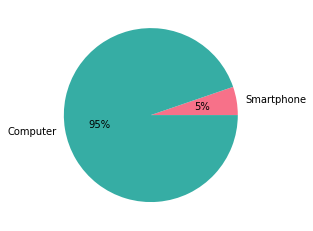

Wie leicht ist die Oberfläche zu bedienen?


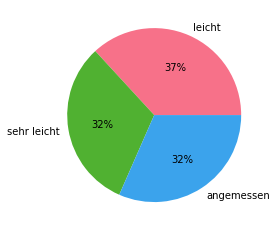

Sind alle Elemente der Nutzeroberfläche gut lesbar? Falls nicht, welche?


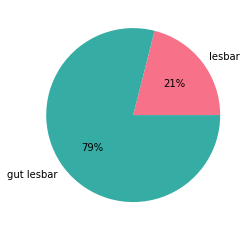

Wie gut hat Ihnen das Design gefallen? (Farbschema, Bedienelemente, ...)


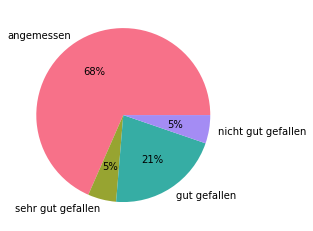

Wie haben Sie Reaktionszeit des Systems empfunden?


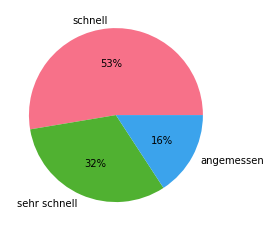

Wie schnell lädt die Website?


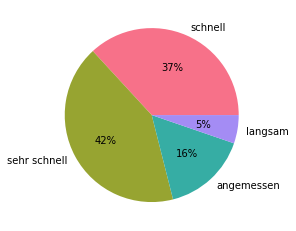

Ich habe immer eine Antwort vom System bekommen


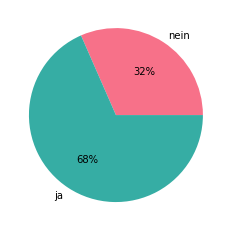

Die Website war mindestens einmal nicht verfügbar


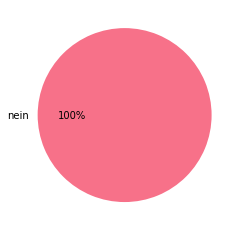

Ein Bedienelement (Texteingabe, Senden) hat mindestens einmal nicht funktioniert


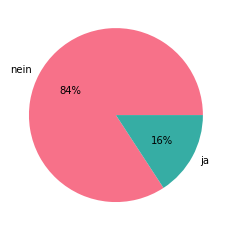

Das System konnte meine Fragen beantworten


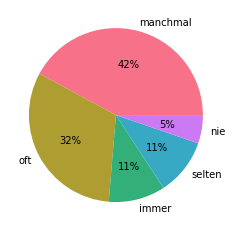

Waren die anclickbare Antworten hilfreich?


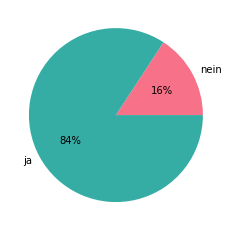

Wie häufig hat das System ihre Eingaben richtig verstsanden?


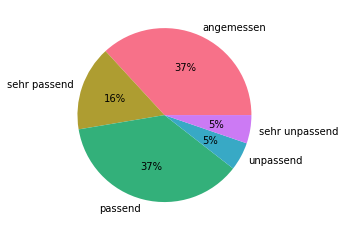

Wie gut funktioniert die Chat-Interaktion?


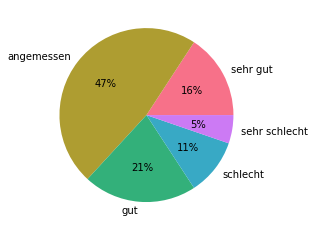

Wie verständlich sind die Antworten?


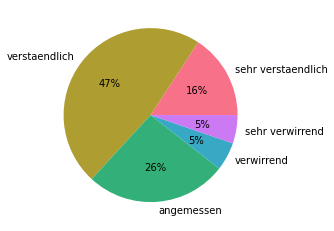

Die Antworten sind..


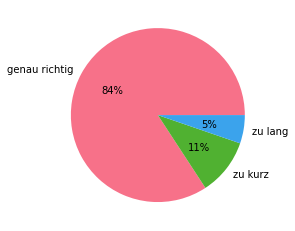

Der Informationsgehalt der Antworten ist...


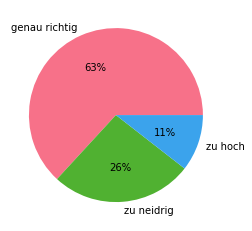

Nützlich


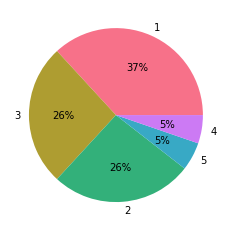

Angenehm


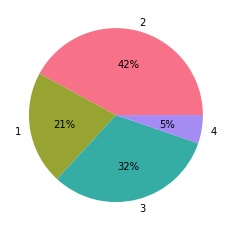

Schlecht


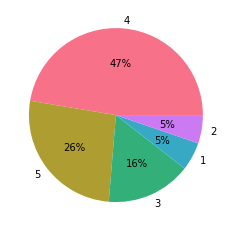

Hilfreich


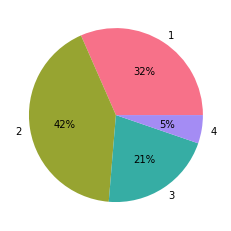

Wirksam


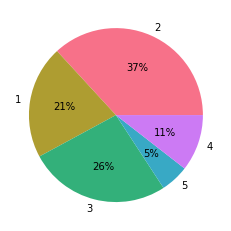

Irritierend


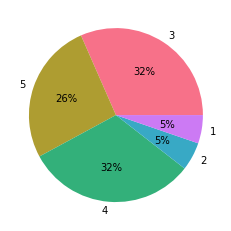

Helfend


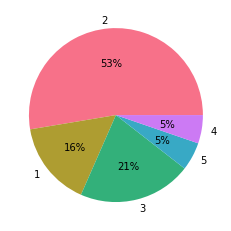

War die Informationsgewinnung mit Hilfe des Chatbots schneller als mit Ihren bisherigen Methoden?


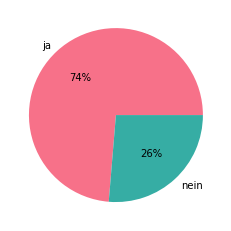

War die Informationsgewinnung mit Hilfe des Chatbots komfortabler als mit Ihren bisherigen Methoden?


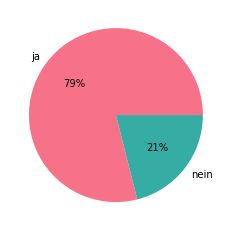

Wurden Ihre Erwartungen an den Chatbot erfüllt?


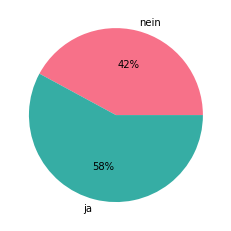

Wie wahrscheinlich ist es, dass Sie einen Chatbot wie diesen in Zukunft für Fragen bzgl. Ihrer Dienstreise verwenden würden?


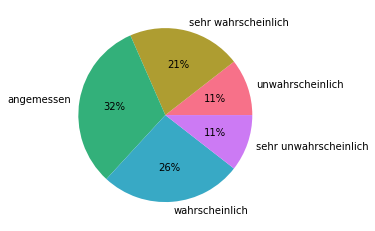

Anmerkungen zur Frage 4.14. (Methoden und Endgeräten)


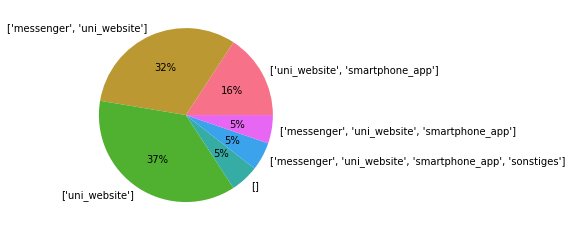

In welchen Situationen können Sie sich vorstellen, einen Chatbot (wie diesen) zu nutzen?


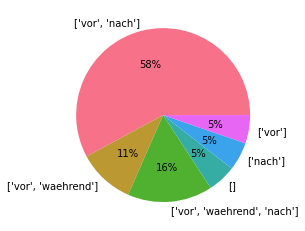

In welchen Situationen können Sie sich nicht vorstellen, eine Chatbot (wie diesen) zu nutzen?


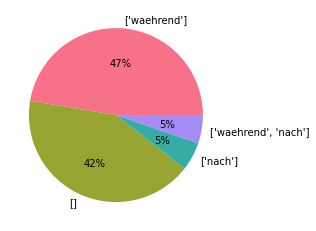

In [78]:
for l in quantitative_labels:
    if l != "username":
        question = question_label_lookup[l]
        responses = dict_responses[l]
        r_dict = defaultdict(int)
        for answer in responses:
            r_dict[answer] += 1
        print(question)
        answer_labels = [key for key in r_dict]
        data = [r_dict[key] for key in answer_labels]
        colors = sns.color_palette("husl", len(answer_labels))
        plt.pie(data, labels = answer_labels, colors = colors, autopct='%.0f%%')
        plt.show()
